# Chapter 8. 텍스트 마이닝

> [분석스토리]  
김 대표는 인터넷 상점을 통해 처음으로 키운 닭 300마리를 판매했습니다. 경쟁사 대비 품질 경쟁력이 떨어진다고 생각해 가격을 낮췄더니 1주일 만에 300마리가 모두 판매되었습니다. 놀라운 일이었고, 당장 부자가 될 것만 같은 생각에 기쁨을 감출 수가 없었습니다. 그리고 고객들의 상품 리뷰가 하나씩 달리기 시작했습니다. 리뷰를 읽던 김 대표는 기쁨과 좌절을 동시에 느끼며 고객의 마음을 읽어 부족한 점을 개선해야겠다고 생각했습니다. 과연 고객들은 김 대표의 닭을 어떻게 생각하고 있을까요?

## 1. 고객 리뷰에서 어떻게 핵심을 파악할 수 있을까? (워드 클라우드)

### 1-1. 워드 클라우드란?

> 워드 클라우드(Word Cloud)는 말 그대로 단어를 구름처럼 표현하는 방법입니다. 텍스트 마이닝 결과를 표현하는 가장 대표적인 방법 중 하나로 많은 키워드 중에서 가장 많이 도출된 단어를 크기와 색상으로 강조해 시각화시킨 것입니다.
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Web_2.0_Map.svg/330px-Web_2.0_Map.svg.png" width="500"/>
    <center>워드클라우드(출처 : wikipedia)</center>
</div>

### 1-2. JDK 설치하기

In [7]:
# 우선 jdk 설치가 필요하며 최신버전 설치
# https://www.oracle.com/java/technologies/downloads/

### 1-3. 패키지 설치하기

In [1]:
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 여기서 cp38(파이썬 3.8.X) 버전에 맞는 JPype 1.1.2를 c:\에 다운받아 설치
!pip install C:\JPype1-1.1.2-cp38-cp38-win_amd64.whl

Processing c:\jpype1-1.1.2-cp38-cp38-win_amd64.whl
  Attempting uninstall: JPype1
    Found existing installation: JPype1 1.3.0
    Uninstalling JPype1-1.3.0:
      Successfully uninstalled JPype1-1.3.0


In [2]:
# tweepy 오류로 인해 특정버전 설치
!pip install tweepy==3.10.0

In [90]:
# 패키지 설치
!pip install wordcloud
!pip install counter
!pip install konlpy

  Using cached Counter-1.0.0.tar.gz (5.2 kB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\nosense\\AppData\\Local\\Temp\\pip-install-smleoxg5\\counter\\setup.py'"'"'; __file__='"'"'C:\\Users\\nosense\\AppData\\Local\\Temp\\pip-install-smleoxg5\\counter\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\nosense\AppData\Local\Temp\pip-pip-egg-info-yhq3iauc'
         cwd: C:\Users\nosense\AppData\Local\Temp\pip-install-smleoxg5\counter\
    Complete output (7 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\nosense\AppData\Local\Temp\pip-install-smleoxg5\counter\setup.py", line 32, in <module>
        long_description=getLongDescription(),
      File "C:\Users\nosense\AppData\Local\Temp\pip-insta

### 1-4. 텍스트 데이터 가공하기

In [15]:
# 워드클라우드 구현을 위한 함수 불러오기
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Hannanum

In [16]:
# 한글파일이기 때문에 cp949 에러가 나므로 encoding 옵션을 추가
txt = open('ch8.txt','rt', encoding='UTF-8').read()

In [17]:
# 텍스트 확인
txt

'닭이 너무 맛있어요 최고!! 육질이 살아있음\n배송도 빠르고 상품도 좋습니다. ^^\n기가막히게 맛있습니다. 사장님 감사합니다.\n닭이 너무 작아요! 양이 작은 편인데도 부족하네요. ><\n완전 만족합니다. 재구매 각이네요.\n삼계탕에 넣었는데 양이 기대 이하네요...\n배송이 늦었네요. 보내주신 아이스팩이 터져서 치운다고 고생했네요. 포장에 신경써야 할듯...\n닭이 엄청 크고 실하네요. 들어갈만한 냄비가 없어서 큰 냄비를 샀네요. 맛도 좋습니다.\n아이스박스가 터져서 왔네요. 비닐도 벗겨지고... 다시 구매하고 싶지 않네요. 그나마 닭이 상하지 않은게 다행인듯...\n닭에 기름이 너무 많네요. 기름제거가 너무 힘들었네요. ㅠㅠ\n살이 너무 퍽퍽해요. 요리를 잘 못한 건지 닭 자체가 그런건지 잘 모르겠네요.\n너무 신선합니다. 살도 너무 부드러워요. 오랜만에 가족들과 맛있는 삼계탕 해먹었네요. 감사합니다.\n가격이 저렴함에도 불구하고, 닭이 너무 신선하고 맛있네요. 담에 또 구매할 생각입니다.\n싼 게 비지떡이라더니 그 말이 딱 맞네요. 저한텐 닭이 너무 작네요. 실망입니다.\n착한 가격에 뽑기가 잘된 건지 저는 너무 맛있게 잘 먹었습니다. 만족합니다. ^0^\n씻은 뒤에 에어프라이에 소금만 쳐서 돌려 먹었는데 남편도, 아이도 너무 잘 먹었습니다. 양이 좀 작은 건 아쉬웠네요.\n만족해요 만족해요 만족해요 만족해요 ^-^\n생닭인데 피가 제대로 안씻긴 듯 합니다. 씻는데 피가 자꾸 나와서 무서웠네요.\n배송하면서 아이스박스가 터진건지 보낼 때부터 이랬던 건지... 닭도 상해서 왔네요. 환불 요청합니다.\n두 마리를 시켰는데 한 마리는 큰 데 나머지 한 마리는 눈에 띄게 작네요. 가격이 싸서 그렇겠죠?\n좋아요~ 저렴한 가격에 잘 산 것 같네요. :)\n어머니가 담에는 좀 더 큰 닭으로 사라고 하시네요. 맛은 있는데 양이 작습니다. ㅡㅡ...\n맛있게 먹었습니다. 배송도 빠른 편이네요.\n싱싱합니다. 추천 박을게요.\n백숙용으로는 적합하지 않은 것 같습니다.

In [18]:
# txt 문서에서 명사만 추출하기
n = Hannanum().nouns(txt)

In [21]:
# 명사 15개만 확인
n[0:15]

['닭',
 '최고',
 '육질',
 '배송',
 '상품',
 '기가막히',
 '사장님',
 '감사',
 '닭',
 '양',
 '편',
 '부족',
 '완전',
 '만족',
 '재구']

In [28]:
# 특정값의 인덱스 찾기
n.index('재구')

ValueError: '재구' is not in list

In [29]:
# 인덱스를 이용해 특정값 변경
n[14] = '재구매'

In [30]:
# 제대로 변경되었는지 확인
n[14]

'재구매'

In [31]:
# 글자수가 2개 이상인 단어만 필터링
n2 = [item for item in n if len(item) >= 2]

In [32]:
# 명사별 빈도 추출
cnt = Counter(n2)

In [37]:
# 빈도수가 많은 단어 순서대로 10개만 표시
cnt.most_common()[0:10]

[('만족', 6),
 ('가격', 4),
 ('배송', 3),
 ('마리', 3),
 ('육질', 2),
 ('감사', 2),
 ('재구매', 2),
 ('삼계탕', 2),
 ('냄비', 2),
 ('아이스박스', 2)]

### 1-5. 워드 클라우드 그리기

In [38]:
# 워드클라우드용 폰트 설정(맑은고딕)
wcs = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color = 'white')

In [39]:
# 단어별 빈도로 워드클라우드 생성
cloud = wcs.generate_from_frequencies(cnt)

<function matplotlib.pyplot.show(close=None, block=None)>

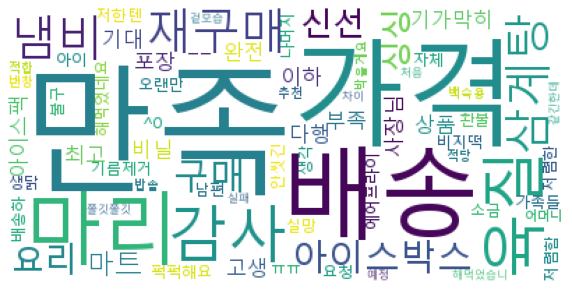

In [42]:
# 워드클라우드 그리기
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show

> [분석스토리]  
김 대표는 첫 판매된 닭의 고객 리뷰 30건을 워드 클라우드를 통해 분석해 봤습니다. 다행히도 많은 분들께서 “만족”한 것 같아 기분이 좋았습니다. 하지만 부정적인 단어도 많이 보였기 때문에 정말로 만족한 고객분들이 많았던 건지 의심이 가기 시작했습니다. 그래서 단어가 아닌 문장 단위로 긍정을 나타내는지, 부정을 나타내는지, 아니면 중립을 나타내는지 감성 분석을 실시해 보기로 했습니다.

---

## 2. 고객들은 정말로 만족했을까? (감성 분석)

### 2-1. 감성 분석이란?

> 감성 분석(Sentiment Analysis)은 텍스트 속에서 감성, 의견 등과 같은 주관적인 정보를 체계적으로 식별, 추출, 정량화하는 기술입니다. 감성 분석은 주로 리뷰 및 설문조사 응답, SNS 결과 등을 분석하는 데 사용됩니다.
분석한 결과는 주로 파이 차트를 이용해 긍정, 부정의 비율이 몇 %인지 표시해 주는 것으로 나타냅니다.

### 2-2. 감성 사전 준비하기

In [90]:
# 이미 만들어진 리뷰 감성 분석 전용 사전 불러옴
import pandas as pd
sentdic = pd.read_csv('review_dict.txt', sep = '\t', encoding = 'utf-8', header = None)
sentdic.columns = ['word','score']

In [91]:
# 감성사전 확인
sentdic.head(10)

,word,score
0,감사합니다,2
1,고생했네요,-2
2,이하네요,-2
3,끝내주네요,2
4,기가막히게,1
5,늦었네요,-2
6,만족합니다,2
7,만족해요,2
8,맛은있네요,1
9,맛있게,2


### 2-3. 텍스트 데이터 가공하기

In [94]:
# 리뷰 한줄씩 리스트로 불러오기
txt_list = open('ch8.txt','rt', encoding='UTF-8').readlines()

In [95]:
# 데이터 5문장만 확인하기
txt_list[0:5]

['닭이 너무 맛있어요 최고!! 육질이 살아있음\n',
 '배송도 빠르고 상품도 좋습니다. ^^\n',
 '기가막히게 맛있습니다. 사장님 감사합니다.\n',
 '닭이 너무 작아요! 양이 작은 편인데도 부족하네요. ><\n',
 '완전 만족합니다. 재구매 각이네요.\n']

In [112]:
# 문장 벡터화를 위함 함수 불러오기
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()

In [113]:
# 문장을 벡터화(띄어쓰기 기준으로 단어 분할)
bow = vector.fit_transform(txt_list)

In [114]:
# 단어를 열이름으로 지정하기 위해 저장
term = vector.get_feature_names()

In [115]:
import pandas as pd
# Document Term Matrix 타입으로 데이터프레임 생성
dtm = pd.DataFrame.sparse.from_spmatrix(data = bow, columns = term)

In [116]:
# 형태 확인(30개의 문장, 191개의 단어)
dtm.shape

(30, 191)

In [118]:
dtm

,ㅠㅠ,ㅡㅡ,가격에,가격이,가족들과,각이네요,감사합니다,같긴한데,같네요,같습니다,...,포장에,피가,하시네요,할듯,합니다,해먹었네요,해먹었습니다,환불,훨씬,힘들었네요
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2-4. 감성 분석

In [119]:
# 한 줄씩 0~190번째 열까지 1이상인 열을 찾으면 해당 열이름을 가져와 감성사전에 있는지 확인 후
# 감성사전에 있으면 해당되는 점수를 가져와서 갯수와 곱한 뒤 d에 리스트로 저장, 아니면 0을 저장
# 총 30개의 행(문장)을 모두 마치면 각 행별 리스트의 합이 ds에 하나씩 추가되서 저장됨
ds = []
for i in range(dtm.shape[0]):    
    d = []
    for j in range(dtm.shape[1]):
        if dtm.iloc[i,j]>=1:
            if sentdic.loc[sentdic.word == dtm.columns[j],'score'].empty != True:
                d.append(sentdic.loc[sentdic.word == dtm.columns[j],'score'].values[0]*dtm.iloc[i,j])
            else:
                d.append(0)
        else:
            d.append(0)
    s = sum(d)
    ds.append(s)

In [120]:
# 각 행(문서)별 합계 5개만 확인
ds[0:5]

[4, 3, 5, -4, 4]

In [121]:
# 리뷰 리스트와 리뷰별 점수합계 결과를 데이터프레임으로 만들기
res = pd.DataFrame(list(zip(txt_list, ds)), columns = ['doc','score'])

In [126]:
# 리뷰별 점수결과 6개만 확인
res.head(6)

,doc,score,pn
0,닭이 너무 맛있어요 최고!! 육질이 살아있음\n,4,Positive
1,배송도 빠르고 상품도 좋습니다. ^^\n,3,Positive
2,기가막히게 맛있습니다. 사장님 감사합니다.\n,5,Positive
3,닭이 너무 작아요! 양이 작은 편인데도 부족하네요. ><\n,-4,Negative
4,완전 만족합니다. 재구매 각이네요.\n,4,Positive
5,삼계탕에 넣었는데 양이 기대 이하네요...\n,-2,Negative


In [123]:
# 리뷰점수가 0보다 크면 긍정, 0이면 중립, 그외면 부정으로 판정하는 리스트 만들기
pn = []
for row in res['score']:
    if row > 0:
        pn.append('Positive')
    elif row == 0:
        pn.append('Neutral')
    else:
        pn.append('Negative')

In [124]:
# 리뷰점수 판정결과 데이터프레임에 추가
res['pn'] = pn

In [127]:
# 리뷰결과 데이터프레임 6개만 확인
res.head(6)

,doc,score,pn
0,닭이 너무 맛있어요 최고!! 육질이 살아있음\n,4,Positive
1,배송도 빠르고 상품도 좋습니다. ^^\n,3,Positive
2,기가막히게 맛있습니다. 사장님 감사합니다.\n,5,Positive
3,닭이 너무 작아요! 양이 작은 편인데도 부족하네요. ><\n,-4,Negative
4,완전 만족합니다. 재구매 각이네요.\n,4,Positive
5,삼계탕에 넣었는데 양이 기대 이하네요...\n,-2,Negative


### 2-5. 결과 시각화

In [128]:
# 판정결과를 갯수기준으로 그룹화
res_g = res.groupby([pn]).count()

In [129]:
# 그룹화 결과 확인
res_g

,doc,score,pn
Negative,13,13,13
Neutral,3,3,3
Positive,14,14,14


In [130]:
# 파이차트 그리기위해 비율 계산
pct = res_g['pn']/res_g['pn'].sum()

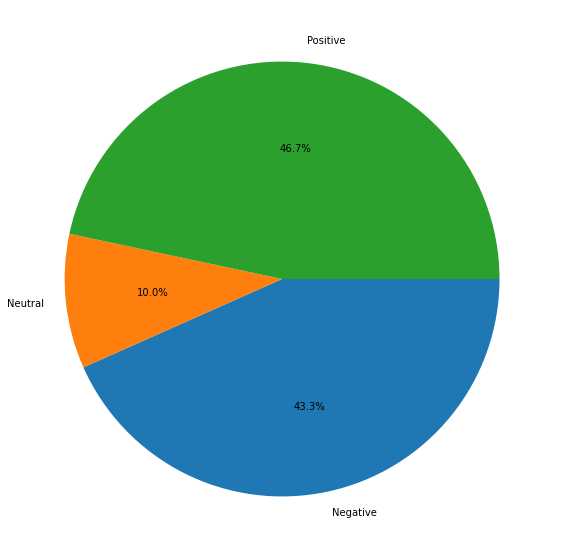

In [131]:
# 파이차트 그리기
plt.figure(figsize=(10, 10))
plt.pie(pct, labels = res_g.index, autopct='%.1f%%', startangle = 0, counterclock = False)
plt.show()

> [분석스토리]  
감성 분석 결과를 확인한 김 대표는 의기소침해졌습니다. 만족한 고객이 더 많을 것이라 생각했는데 실상은 그렇지 못했기 때문입니다. 하지만 이제 겨우 첫 판매일 뿐입니다. 처음임에도 불구하고 43.3%의 고객이 만족했다니 얼마나 대단한 일인가요? 나머지 고객까지 만족시키기 위해 김 대표는 지금보다 훨씬 훌륭한 품질의 닭을 키우고 말겠다고 다짐했습니다. 그러기 위해서는 지금처럼 끊임없는 데이터 분석과 기준 정립 그리고 실행 능력이 필요할 것입니다. 그렇게 된다면 아마도 머지않아 김 대표의 농장은 충분히 경쟁력 있는 회사로 우뚝 설 것입니다.